Memorized Pattern: [1, -1, -1, 1]
Input Pattern: [-1, 1, -1, 1]
Predicted Pattern: [-1.  1. -1.  1.]
Number of Steps to Reach Stable State: 10


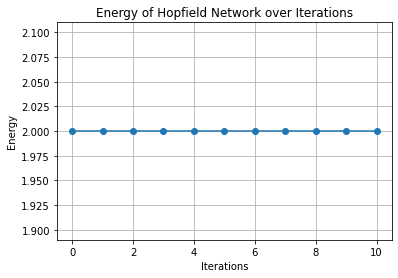

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.array(pattern).reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
            np.fill_diagonal(self.weights, 0)

    def predict(self, pattern):
        pattern = np.array(pattern).reshape(-1, 1)
        steps = 0
        pattern_states = [pattern.flatten()]
        for _ in range(10):  # Set a number of iterations for convergence
            old_pattern = pattern.copy()
            pattern = np.sign(np.dot(self.weights, pattern))
            pattern_states.append(pattern.flatten())
            steps += 1
            if np.array_equal(pattern, old_pattern):
                break
        return pattern.flatten(), steps, pattern_states

    def calculate_energy(self, pattern):
        return -0.5 * np.dot(pattern.T, np.dot(self.weights, pattern))

# Example usage
if __name__ == "__main__":
    num_neurons = 4
    hopfield_net = HopfieldNetwork(num_neurons)

    # Define the pattern to be memorized
    memorized_pattern = [1, -1, -1, 1]

    # Train the network with the memorized pattern
    hopfield_net.train([memorized_pattern])

    # Test the network with the input pattern
    input_pattern = [-1, 1, -1, 1]
    predicted_pattern, steps, pattern_states = hopfield_net.predict(input_pattern)

    energies = []  # List to store energy values at each step
    for state in pattern_states:
        energy = hopfield_net.calculate_energy(np.array(state).reshape(-1, 1))
        energies.append(energy.item())

    print("Memorized Pattern:", memorized_pattern)
    print("Input Pattern:", input_pattern)
    print("Predicted Pattern:", predicted_pattern)
    print("Number of Steps to Reach Stable State:", steps)
    
    # Plotting the energy over iterations
    plt.plot(range(len(energies)), energies, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    plt.title('Energy of Hopfield Network over Iterations')
    plt.grid(True)
    plt.show()


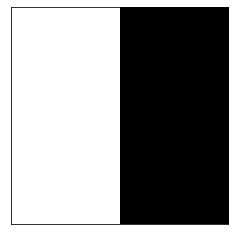

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the pattern as a list of +1 and -1
pattern = input_pattern  # Example pattern; replace this with your desired pattern

# Reshape the pattern into a 2x2 grid
grid = np.array(pattern).reshape(2, 2)

# Create a plot to display the grid
plt.imshow(grid, cmap='binary', interpolation='nearest')  # Use 'binary' colormap

# Hide gridlines for better visualization
plt.grid(visible=False)
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


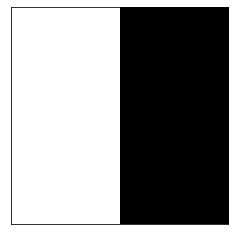

In [3]:
# Define the pattern as a list of +1 and -1
pattern = predicted_pattern  # Example pattern; replace this with your desired pattern

# Reshape the pattern into a 2x2 grid
grid = np.array(pattern).reshape(2, 2)

# Create a plot to display the grid
plt.imshow(grid, cmap='binary', interpolation='nearest')  # Use 'binary' colormap

# Hide gridlines for better visualization
plt.grid(visible=False)
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()